### Import your libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Load your dataset

In [2]:
HR = pd.read_csv('HR_Missing_Values.csv')


### Explore your data 

* First 5 recods.
* Last 5 records. 
* Check data types.
* Show statistical summary.
* Is there any missing values?
* Applay two more data analysis from your choose.

In [3]:
HR.head()

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
0,"Adinolfi, Wilson K",10026,62506.0,19,Production Technician I,07/10/83,M,Single,White,7/5/2011,NaN,Production,Michael Albert,22.0,LinkedIn,1.0
1,"Ait Sidi, Karthikeyan",10084,104437.0,27,Sr. DBA,05/05/75,M,Married,White,3/30/2015,6/16/2016,IT/IS,Simon Roup,4.0,Indeed,17.0
2,"Akinkuolie, Sarah",10196,64955.0,20,Production Technician II,09/19/88,F,Married,White,7/5/2011,9/24/2012,Production,Kissy Sullivan,20.0,LinkedIn,3.0
3,"Alagbe,Trina",10088,64991.0,19,Production Technician I,NaN,F,Married,White,1/7/2008,NaN,Production,Elijiah Gray,16.0,Indeed,15.0
4,NaN,10069,50825.0,19,Production Technician I,09/08/89,F,Divorced,White,7/11/2011,9/6/2016,Production,Webster Butler,39.0,Google Search,2.0


In [4]:
HR.tail()

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
306,"Woodson, Jason",10135,65893.0,20,Production Technician II,05/11/85,M,Single,White,7/7/2014,NaN,Production,Kissy Sullivan,20.0,LinkedIn,13.0
307,"Ybarra, Catherine",10301,48513.0,19,Production Technician I,NaN,F,Single,Asian,9/2/2008,9/29/2015,Production,Brannon Miller,12.0,Google Search,4.0
308,NaN,10010,220450.0,6,CIO,NaN,F,Single,White,4/10/2010,NaN,IT/IS,Janet King,2.0,Employee Referral,16.0
309,"Zhou, Julia",10043,89292.0,9,Data Analyst,02/24/79,F,Single,White,3/30/2015,NaN,IT/IS,Simon Roup,4.0,Employee Referral,NaN
310,NaN,10271,45046.0,19,Production Technician I,08/17/78,F,Widowed,Asian,9/29/2014,NaN,Production,David Stanley,14.0,LinkedIn,2.0


In [5]:
HR.dtypes

Employee_Name         object
EmpID                  int64
Salary               float64
PositionID             int64
Position              object
DOB                   object
Sex                   object
MaritalDesc           object
RaceDesc              object
DateofHire            object
DateofTermination     object
Department            object
ManagerName           object
ManagerID            float64
RecruitmentSource     object
Absences             float64
dtype: object

In [6]:
HR.describe()

,EmpID,Salary,PositionID,ManagerID,Absences
count,311.000000,249.000000,311.000000,303.000000,280.000000
mean,10156.000000,67972.662651,16.845659,14.570957,10.128571
std,89.922189,22995.908395,6.223419,8.078306,5.946407
min,10001.000000,45046.000000,1.000000,1.000000,1.000000
25%,10078.500000,55315.000000,18.000000,10.000000,4.750000
50%,10156.000000,62957.000000,19.000000,15.000000,10.000000
75%,10233.500000,71707.000000,20.000000,19.000000,15.250000
max,10311.000000,220450.000000,30.000000,39.000000,20.000000


In [7]:
HR.isnull().sum()

Employee_Name         93
EmpID                  0
Salary                62
PositionID             0
Position               0
DOB                   31
Sex                   62
MaritalDesc            0
RaceDesc               0
DateofHire             0
DateofTermination    207
Department             0
ManagerName            0
ManagerID              8
RecruitmentSource      0
Absences              31
dtype: int64

Yes there is missing values in Employee_Name, Salary, DOB, Sex, DateofTermination, and Absences

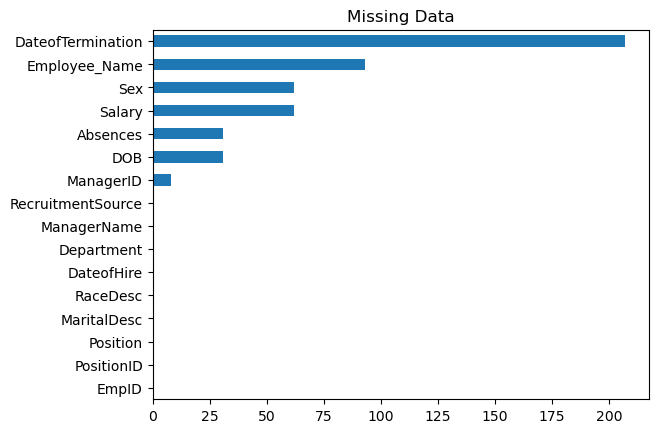

In [8]:
HR.isnull().sum().sort_values().plot(kind="barh", title="Missing Data");

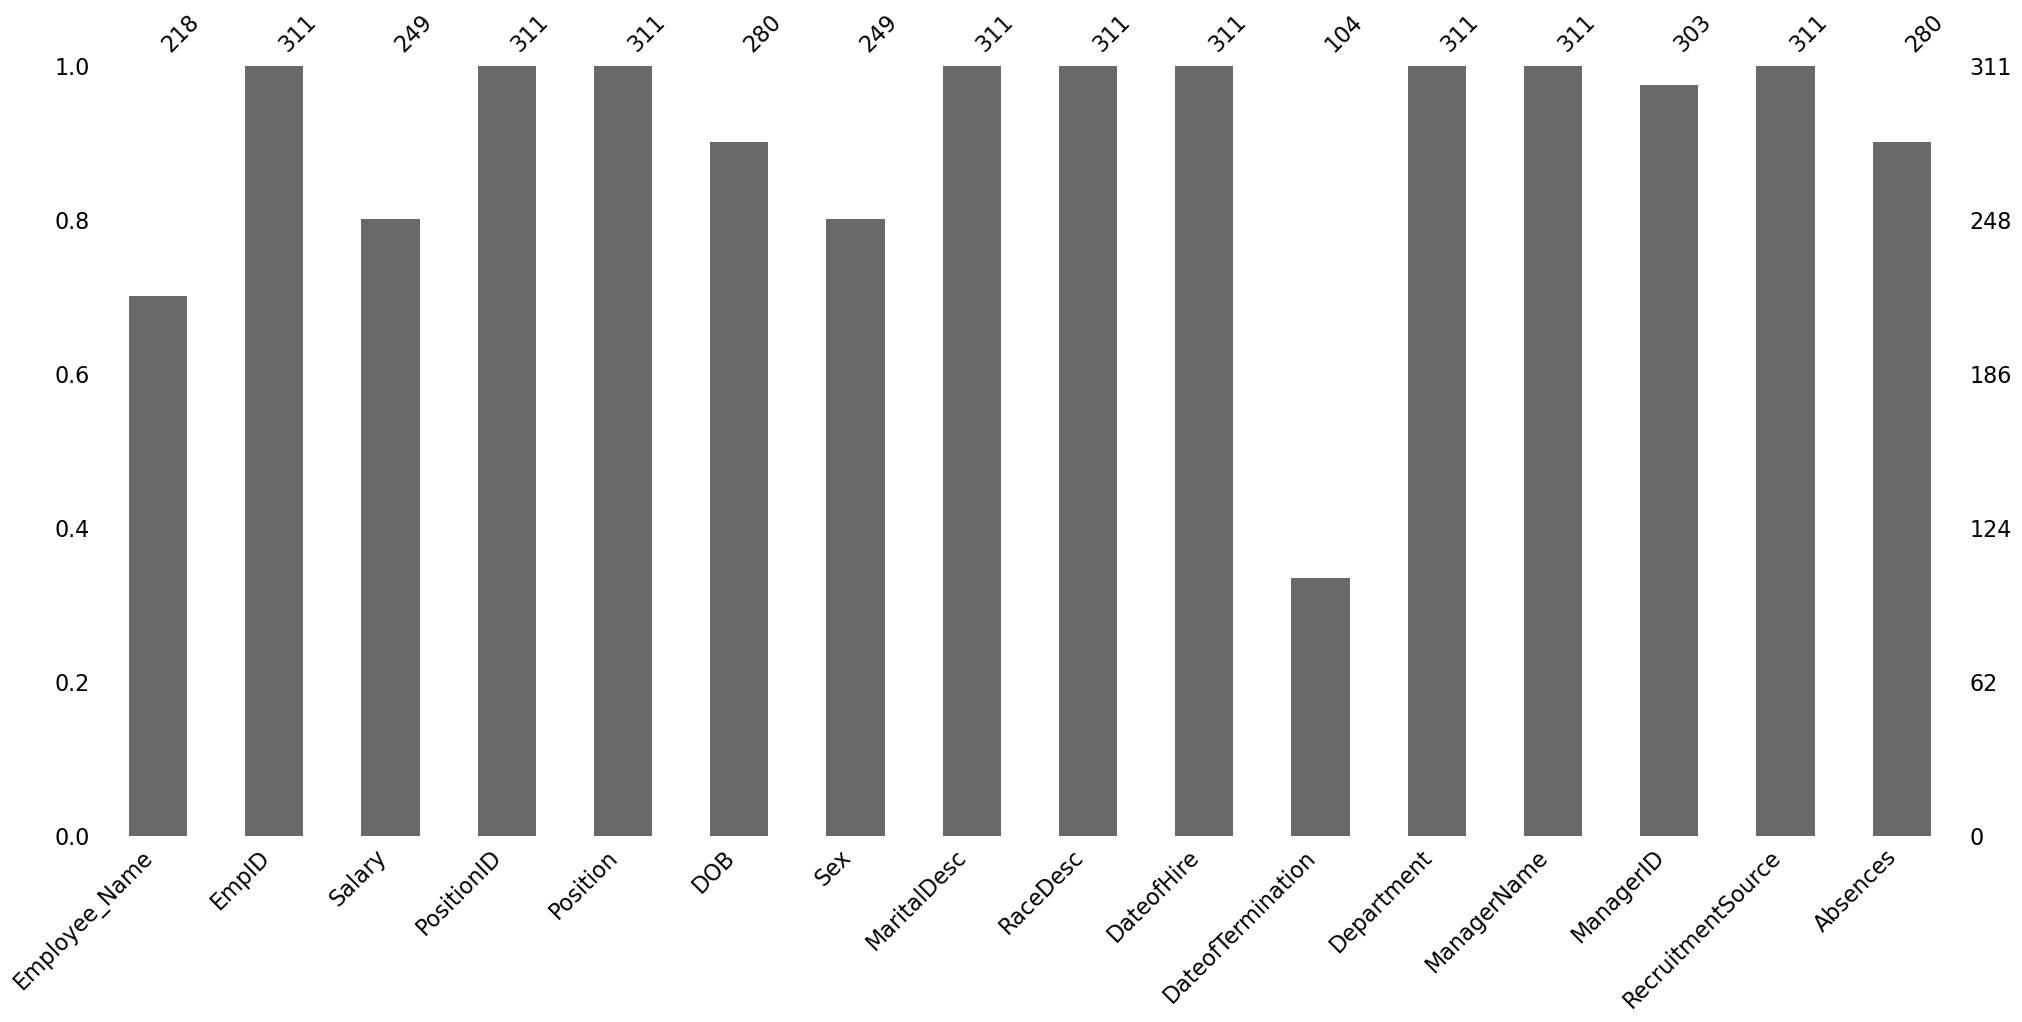

In [9]:
import missingno as msno

msno.bar(HR);

### Do the following steps for each column with missing values.
* Identity the column.
* How much precentage the missing value represents?
* What is the best way to handle these missing values and why?
* Apply your method to the column.

In [10]:
Precentage=(HR.isnull().sum()/len(HR))*100
Precentage

Employee_Name        29.903537
EmpID                 0.000000
Salary               19.935691
PositionID            0.000000
Position              0.000000
DOB                   9.967846
Sex                  19.935691
MaritalDesc           0.000000
RaceDesc              0.000000
DateofHire            0.000000
DateofTermination    66.559486
Department            0.000000
ManagerName           0.000000
ManagerID             2.572347
RecruitmentSource     0.000000
Absences              9.967846
dtype: float64

In the Sex column 
i can extract the name of the people having missing value in Sex and search if it's a male or female name

In [11]:
nullName=HR.loc[HR['Sex'].isnull()]
nullName[nullName['Employee_Name'].notnull()]

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
15,"Bates, Norman",10061,57834.0,19,Production Technician I,10/18/81,NaN,Single,White,2/21/2011,8/4/2017,Production,Kelley Spirea,18.0,Google Search,20.0
16,"Beak, Kimberly",10023,70131.0,20,Production Technician II,04/17/66,NaN,Married,White,7/21/2016,NaN,Production,Kelley Spirea,18.0,Employee Referral,16.0
27,"Bozzi, Charles",10175,74312.0,18,Production Manager,03/10/70,NaN,Single,Asian,9/30/2013,8/7/2014,Production,Janet King,2.0,Indeed,14.0
39,"Carr, Claudia N",10082,NaN,27,Sr. DBA,06/06/86,NaN,Single,Black or African American,6/30/2016,NaN,IT/IS,Simon Roup,4.0,LinkedIn,7.0
42,"Champaigne, Brian",10108,110929.0,5,BI Director,NaN,NaN,Married,White,9/6/2016,NaN,IT/IS,Jennifer Zamora,5.0,Indeed,8.0
44,"Chang, Donovan E",10154,NaN,19,Production Technician I,08/24/83,NaN,Single,White,7/8/2013,NaN,Production,Webster Butler,NaN,LinkedIn,4.0
51,"Clukey, Elijian",10029,50373.0,19,Production Technician I,08/26/80,NaN,Married,White,7/6/2016,NaN,Production,Brannon Miller,12.0,Employee Referral,5.0
56,"Cornett, Lisa",10094,63381.0,19,Production Technician I,03/31/77,NaN,Married,White,1/5/2015,NaN,Production,Kelley Spirea,18.0,Indeed,6.0
67,"Delarge, Alex",10306,61568.0,3,Area Sales Manager,11/02/75,NaN,Single,Two or more races,9/29/2014,NaN,Sales,John Smith,17.0,Indeed,5.0
73,"DiNocco, Lily",10284,61584.0,19,Production Technician I,12/02/78,NaN,Married,Black or African American,1/7/2013,NaN,Production,Brannon Miller,12.0,Indeed,6.0


In [12]:
Male=['Bates, Norman', 'Beak, Kimberly', 'Bozzi, Charles', 'Champaigne, Brian', 'Clukey, Elijian',
       'Delarge, Alex', 'Kampew, Donysha', 'Knapp, Bradley J', 'Leach, Dallas', 'Lecter, Hannibal',
       'Leruth, Giovanni', 'Monkfish, Erasumus', 'Moran, Patrick', 'Newman, Richard', 'Ozark, Travis',
       'Squatrito, Kristen', 'Sullivan, Timothy', 'Villanueva, Noah', 'Whittier, Scott']


Female=['Carr, Claudia N','Cornett, Lisa','Houlihan, Debra','Hudson, Jane','Huynh, Ming',
        'Johnson, Noelle','Motlagh, Dawn','Onque, Jasmine','Panjwani, Nina','Perry, Shakira',
        'Sutwell, Barbara','Tavares, Desiree','Valentin,Jackie','Volk, Colleen',
        'Von Massenbach, Anna','Williams, Jacquelyn']

Fill in the sex according to their classification in Female and Male list 
and filling the resst if the missing value with the mode of the Sex column

In [13]:
HR.loc[HR['Employee_Name'].isin(Male), 'Sex']='M'
HR.loc[HR['Employee_Name'].isin(Female), 'Sex']='F'
sexMode=HR['Sex'].mode()[0]
HR['Sex']=HR['Sex'].fillna(sexMode)

In [14]:
HR['Sex'].isnull().any()

False

Dropping the column Employee_Name because it's not needed anymore

In [15]:
HR=HR.drop(['Employee_Name'], axis=1)

In the Salary i think it's best to fill the missing value depending on the PositionID and Sex

In [16]:
HR['Salary']=HR.groupby(['Sex', 'PositionID'])['Salary'].transform(lambda x: x.fillna(x.mean(skipna=True)))

In [17]:
HR['Salary'].isnull().any()

True

In this case i will extract the Salary depending on the year of expertise

In [18]:
HR['DateofHire']=pd.to_datetime(HR['DateofHire'])

In [19]:
HR['YearOfHire']=pd.DatetimeIndex(HR['DateofHire']).year
yearMean=HR.groupby('YearOfHire')['Salary'].mean()
meanDict=yearMean.to_dict()

for index, row in HR.iterrows():
    if pd.isnull(row['Salary']):
        hire_year=row['YearOfHire']
        mean_salary=meanDict[hire_year]
        HR.at[index, 'Salary']=mean_salary

In [20]:
HR['Salary'].isnull().any()

False

In DOB i sorted the data based on PositionID and apply forward filling because i think it's best to fill it base on athor DOB with the same position

In [21]:
HR=HR.sort_values(by = 'PositionID').reset_index(drop=True)

HR['DOB'].fillna(method="ffill", inplace=True)

In [22]:
HR['DOB'].isnull().any()

False

In [23]:
nullName=HR.loc[HR['ManagerID'].isnull()]
nullName

,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences,YearOfHire
121,10011,46738.000000,19,Production Technician I,01/12/73,F,Married,Asian,2011-11-28,NaN,Production,Webster Butler,NaN,Google Search,16.0,2011
129,10071,50923.000000,19,Production Technician I,03/10/75,F,Single,Asian,2013-09-30,NaN,Production,Webster Butler,NaN,Google Search,14.0,2013
200,10154,55825.347222,19,Production Technician I,08/24/83,F,Single,White,2013-07-08,NaN,Production,Webster Butler,NaN,LinkedIn,4.0,2013
202,10277,53938.818182,19,Production Technician I,04/06/79,M,Single,Asian,2013-07-08,NaN,Production,Webster Butler,NaN,LinkedIn,NaN,2013
229,10184,65288.000000,20,Production Technician II,07/28/83,M,Single,White,2014-09-29,NaN,Production,Webster Butler,NaN,Google Search,NaN,2014
233,10136,65902.000000,20,Production Technician II,09/27/87,F,Single,Black or African American,2014-02-17,NaN,Production,Webster Butler,NaN,LinkedIn,7.0,2014
236,10214,64995.000000,20,Production Technician II,05/07/92,F,Separated,White,2015-06-05,NaN,Production,Webster Butler,NaN,Indeed,6.0,2015
255,10077,62385.000000,20,Production Technician II,08/25/76,F,Married,White,2016-05-11,NaN,Production,Webster Butler,NaN,LinkedIn,NaN,2016


I noticed that all missing value in ManagerID belong to Webster Butler and his Id is 39.0

In [24]:
HR['ManagerID'].fillna(39.0, inplace=True)

In [25]:
HR['ManagerID'].isnull().any()

False

In [26]:
HR['DateofTermination'] = pd.to_datetime(HR['DateofTermination'])
int(((HR['DateofTermination']-HR['DateofHire']).dt.days/365.25).mean())

3

I noticed that most people spend almost 3 years, then their DateofTermination end 

In [27]:
HR["DateofTermination"].fillna(HR["DateofHire"]+pd.DateOffset(years=3), inplace=True)

In [28]:
HR['DateofTermination'].isnull().any()

False

In Absences i believe we should take the mode because it's category data

In [29]:
absencesMode=HR['Absences'].mode()[0]
HR['Absences']=HR['Absences'].fillna(absencesMode)

In [30]:
HR['Absences'].isnull().any()

False

In [31]:
HR.isna().sum()

EmpID                0
Salary               0
PositionID           0
Position             0
DOB                  0
Sex                  0
MaritalDesc          0
RaceDesc             0
DateofHire           0
DateofTermination    0
Department           0
ManagerName          0
ManagerID            0
RecruitmentSource    0
Absences             0
YearOfHire           0
dtype: int64